In [163]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [175]:
stock = yf.Ticker('AAPL')
data = stock.history(period="max")
print(data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
1980-12-12 00:00:00-05:00  0.098389  0.098817  0.098389  0.098389  469033600   
1980-12-15 00:00:00-05:00  0.093684  0.093684  0.093256  0.093256  175884800   
1980-12-16 00:00:00-05:00  0.086839  0.086839  0.086412  0.086412  105728000   
1980-12-17 00:00:00-05:00  0.088550  0.088978  0.088550  0.088550   86441600   
1980-12-18 00:00:00-05:00  0.091118  0.091545  0.091118  0.091118   73449600   

                           Dividends  Stock Splits  
Date                                                
1980-12-12 00:00:00-05:00        0.0           0.0  
1980-12-15 00:00:00-05:00        0.0           0.0  
1980-12-16 00:00:00-05:00        0.0           0.0  
1980-12-17 00:00:00-05:00        0.0           0.0  
1980-12-18 00:00:00-05:00        0.0           0.0  


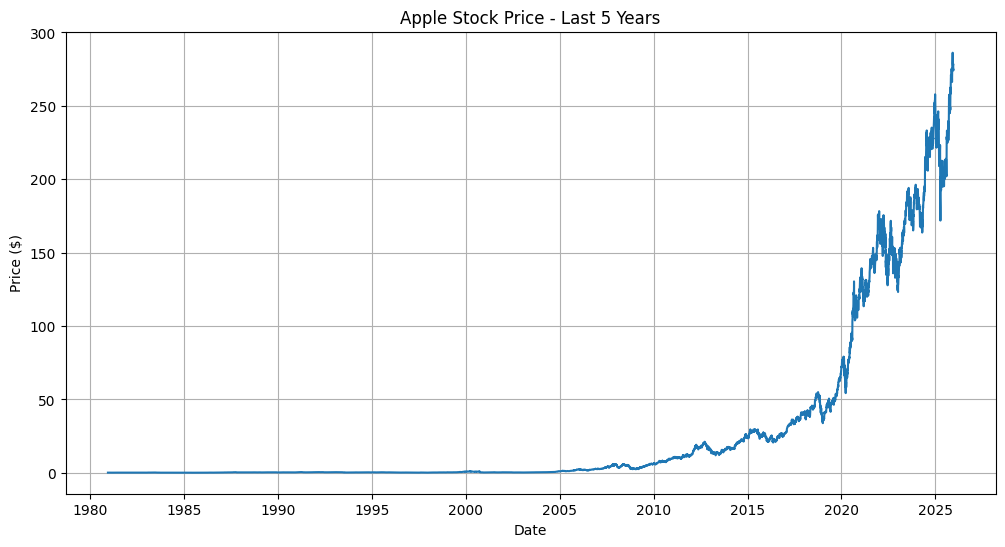

In [176]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'])
plt.title('Apple Stock Price - Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

                              Close  Daily_Return
Date                                             
1980-12-12 00:00:00-05:00  0.098389           NaN
1980-12-15 00:00:00-05:00  0.093256     -0.052171
1980-12-16 00:00:00-05:00  0.086412     -0.073398
1980-12-17 00:00:00-05:00  0.088550      0.024751
1980-12-18 00:00:00-05:00  0.091118      0.028993
1980-12-19 00:00:00-05:00  0.096678      0.061029
1980-12-22 00:00:00-05:00  0.101384      0.048670
1980-12-23 00:00:00-05:00  0.105662      0.042198
1980-12-24 00:00:00-05:00  0.111223      0.052629
1980-12-26 00:00:00-05:00  0.121490      0.092308


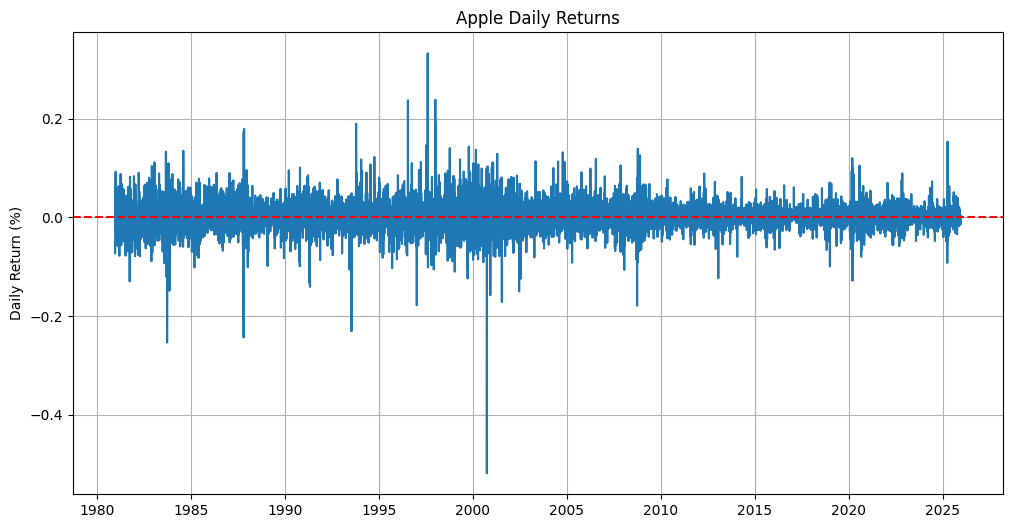

In [177]:
data['Daily_Return'] = data['Close'].pct_change()

print(data[['Close', 'Daily_Return']].head(10))

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Daily_Return'])
plt.title('Apple Daily Returns')
plt.ylabel('Daily Return (%)')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

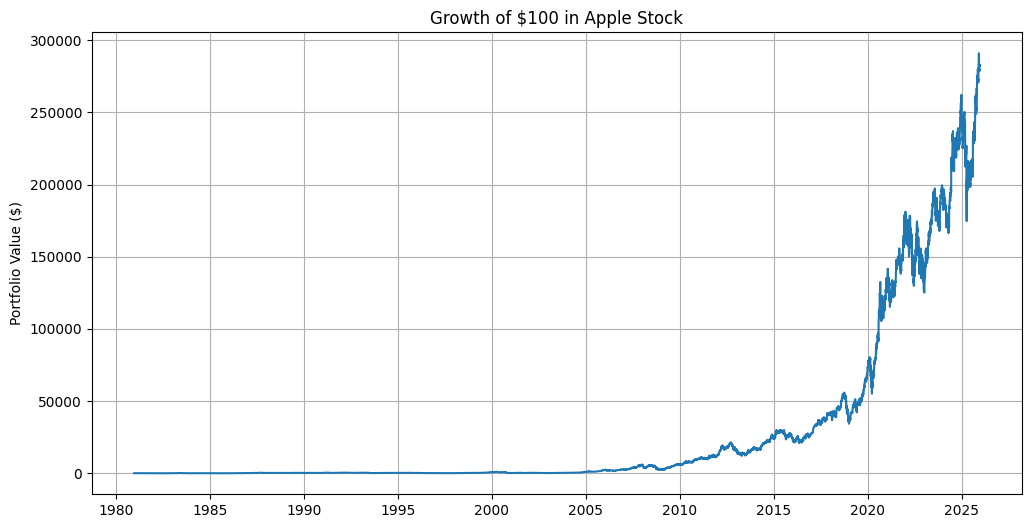

$100 invested from day 1: $279105.04


In [178]:
data['Cumulative_Return'] = (1 + data['Daily_Return']).cumprod()

initial_investment = 100
data['Portfolio_Value'] = initial_investment * data['Cumulative_Return']

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Portfolio_Value'])
plt.title('Growth of $100 in Apple Stock')
plt.ylabel('Portfolio Value ($)')
plt.grid(True)
plt.show()

final_value = data['Portfolio_Value'].iloc[-1]
print(f"$100 invested from day 1: ${final_value:.2f}")

In [179]:
info = stock.info

print(f"Company: {info.get('longName')}")
print(f"Sector: {info.get('sector')}")
print(f"P/E Ratio: {info.get('trailingPE')}")
print(f"Market Cap: ${info.get('marketCap'):,}")
print(f"52 Week High: ${info.get('fiftyTwoWeekHigh')}")
print(f"52 Week Low: ${info.get('fiftyTwoWeekLow')}")

Company: Apple Inc.
Sector: Technology
P/E Ratio: 36.76171
Market Cap: $4,075,319,197,696
52 Week High: $288.62
52 Week Low: $169.21


In [192]:
stocks = {
    # Technology
    'Tech': ['AAPL', 'MSFT', 'GOOGL', 'NVDA', 'META', 'ADBE', 'CRM', 'INTC'],
    
    # Finance
    'Finance': ['JPM', 'BAC', 'WFC', 'GS', 'MS', 'V', 'MA'],
    
    # Healthcare
    'Healthcare': ['JNJ', 'UNH', 'PFE', 'ABBV', 'TMO', 'MRK'],
    
    # Consumer
    'Consumer': ['AMZN', 'WMT', 'HD', 'NKE', 'COST', 'MCD', 'SBUX'],
    
    # Energy
    'Energy': ['XOM', 'CVX', 'COP', 'EOG'],
    
    # Industrials
    'Industrial': ['BA', 'CAT', 'GE', 'UPS']
}

all_stocks = []
for sector, tickers in stocks.items():
    all_stocks.extend(tickers)

print(f"Total stocks: {len(all_stocks)}")
print(all_stocks)

Total stocks: 36
['AAPL', 'MSFT', 'GOOGL', 'NVDA', 'META', 'ADBE', 'CRM', 'INTC', 'JPM', 'BAC', 'WFC', 'GS', 'MS', 'V', 'MA', 'JNJ', 'UNH', 'PFE', 'ABBV', 'TMO', 'MRK', 'AMZN', 'WMT', 'HD', 'NKE', 'COST', 'MCD', 'SBUX', 'XOM', 'CVX', 'COP', 'EOG', 'BA', 'CAT', 'GE', 'UPS']


In [193]:
import time

stock_data = {}

for ticker in all_stocks:
    try:
        print(f"Downloading {ticker}...")
        stock = yf.Ticker(ticker)
        data = stock.history(period="5y")
        
        if len(data) > 0:
            stock_data[ticker] = data
            print(f"✓ {ticker}: {len(data)} days of data")
        else:
            print(f"✗ {ticker}: No data available")
        
        time.sleep(0.5)
        
    except Exception as e:
        print(f"✗ {ticker}: Error - {e}")

print(f"\nSuccessfully downloaded {len(stock_data)} stocks")

✓ AAPL: 1255 days of data
✓ MSFT: 1255 days of data
✓ GOOGL: 1255 days of data
✓ NVDA: 1255 days of data
✓ META: 1255 days of data
✓ ADBE: 1255 days of data
✓ CRM: 1255 days of data
✓ INTC: 1255 days of data
✓ JPM: 1255 days of data
✓ BAC: 1255 days of data
✓ WFC: 1255 days of data
✓ GS: 1255 days of data
✓ MS: 1255 days of data
✓ V: 1255 days of data
✓ MA: 1255 days of data
✓ JNJ: 1255 days of data
✓ UNH: 1255 days of data
✓ PFE: 1255 days of data
✓ ABBV: 1255 days of data
✓ TMO: 1255 days of data
✓ MRK: 1255 days of data
✓ AMZN: 1255 days of data
✓ WMT: 1255 days of data
✓ HD: 1255 days of data
✓ NKE: 1255 days of data
✓ COST: 1255 days of data
✓ MCD: 1255 days of data
✓ SBUX: 1255 days of data
✓ XOM: 1255 days of data
✓ CVX: 1255 days of data
✓ COP: 1255 days of data
✓ EOG: 1255 days of data
✓ BA: 1255 days of data
✓ CAT: 1255 days of data
✓ GE: 1255 days of data
✓ UPS: 1255 days of data

Successfully downloaded 36 stocks


In [194]:
close_prices = pd.DataFrame()

for ticker, data in stock_data.items():
    close_prices[ticker] = data['Close']

print(close_prices.head())
print(f"\nShape: {close_prices.shape}")  # Should be ~1250 rows x 30-40 columns

close_prices.to_csv('stock_prices.csv')
print("Saved to stock_prices.csv")

                                 AAPL        MSFT      GOOGL       NVDA  \
Date                                                                      
2020-12-17 00:00:00-05:00  125.283318  210.542221  86.372887  13.303836   
2020-12-18 00:00:00-05:00  123.297470  209.745789  85.663750  13.234783   
2020-12-21 00:00:00-05:00  124.825790  213.583969  86.077614  13.294862   
2020-12-22 00:00:00-05:00  128.378891  214.879333  85.366005  13.241015   
2020-12-23 00:00:00-05:00  127.483276  212.077484  85.763504  12.972768   

                                 META        ADBE         CRM       INTC  \
Date                                                                       
2020-12-17 00:00:00-05:00  272.575989  495.359985  223.568268  45.788879   
2020-12-18 00:00:00-05:00  274.482605  502.950012  225.062531  42.905033   
2020-12-21 00:00:00-05:00  270.897736  498.390015  224.112534  41.910614   
2020-12-22 00:00:00-05:00  265.237183  504.170013  228.763596  41.738846   
2020-12-23 00:00:0

In [195]:
returns = close_prices.pct_change()

avg_returns = returns.mean() * 252  # 252 trading days/year
print("=" * 50)
print("ANNUALIZED RETURNS")
print("=" * 50)
print(avg_returns.sort_values(ascending=False))

volatility = returns.std() * np.sqrt(252)  # Annualized
print("\n" + "=" * 50)
print("ANNUALIZED VOLATILITY (RISK)")
print("=" * 50)
print(volatility.sort_values(ascending=False))

risk_adjusted = avg_returns / volatility
print("\n" + "=" * 50)
print("RISK-ADJUSTED RETURNS (Return per unit of risk)")
print("=" * 50)
print(risk_adjusted.sort_values(ascending=False))

ANNUALIZED RETURNS
NVDA     0.655952
GE       0.394878
GS       0.318791
GOOGL    0.303024
CAT      0.300877
WFC      0.299906
MS       0.274208
META     0.272327
XOM      0.272130
JPM      0.250600
COP      0.247331
EOG      0.245314
ABBV     0.216907
WMT      0.209009
COST     0.206103
MSFT     0.197202
AAPL     0.196673
BAC      0.190188
CVX      0.176528
MA       0.139370
V        0.131790
AMZN     0.125721
MCD      0.114866
MRK      0.109786
JNJ      0.104696
HD       0.103251
CRM      0.089104
TMO      0.079031
INTC     0.066433
UNH      0.057273
BA       0.054292
SBUX     0.031421
PFE      0.000551
ADBE    -0.008088
UPS     -0.030498
NKE     -0.074160
dtype: float64

ANNUALIZED VOLATILITY (RISK)
NVDA     0.521557
INTC     0.463613
META     0.434484
BA       0.368772
EOG      0.353397
CRM      0.353095
ADBE     0.352020
AMZN     0.351418
NKE      0.344997
COP      0.334555
GOOGL    0.311259
SBUX     0.310648
WFC      0.308429
GE       0.307143
UNH      0.296673
CAT      0.292382


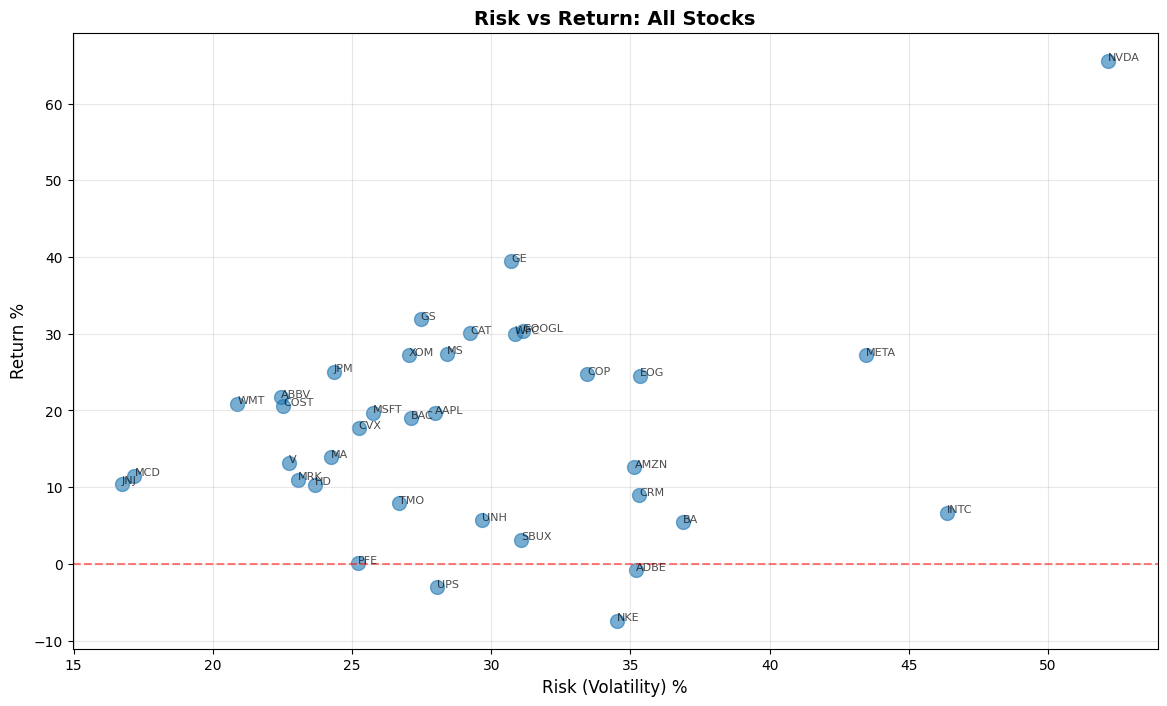

In [196]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.scatter(volatility * 100, avg_returns * 100, s=100, alpha=0.6)

for ticker in close_prices.columns:
    plt.annotate(ticker, 
                 (volatility[ticker] * 100, avg_returns[ticker] * 100),
                 fontsize=8,
                 alpha=0.7)

plt.xlabel('Risk (Volatility) %', fontsize=12)
plt.ylabel('Return %', fontsize=12)
plt.title('Risk vs Return: All Stocks', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.show()

In [197]:
important_metrics = [
    'symbol',
    'longName',
    'sector',
    'industry',
    'marketCap',
    'trailingPE',        # P/E ratio
    'forwardPE',
    'priceToBook',       # P/B ratio
    'returnOnEquity',    # ROE
    'debtToEquity',
    'profitMargins',
    'operatingMargins',
    'currentRatio',      # Liquidity
    'quickRatio',
    'beta',              # Market risk
    'fiftyTwoWeekHigh',
    'fiftyTwoWeekLow',
    'averageVolume'
]

apple_metrics = {}
for metric in important_metrics:
    apple_metrics[metric] = info.get(metric, None)

df_metrics = pd.DataFrame([apple_metrics])
print(df_metrics.T) 

                                     0
symbol                            AAPL
longName                    Apple Inc.
sector                      Technology
industry          Consumer Electronics
marketCap                4075319197696
trailingPE                    36.76171
forwardPE                    30.131758
priceToBook                  55.021034
returnOnEquity                 1.71422
debtToEquity                   152.411
profitMargins                  0.26915
operatingMargins               0.31647
currentRatio                     0.893
quickRatio                       0.771
beta                             1.107
fiftyTwoWeekHigh                288.62
fiftyTwoWeekLow                 169.21
averageVolume                 48896809


In [198]:
def get_fundamentals(ticker_symbol):
    """
    Get fundamental metrics for a stock
    Returns dictionary with key metrics
    """
    try:
        ticker = yf.Ticker(ticker_symbol)
        info = ticker.info
        
        fundamentals = {
            'Symbol': ticker_symbol,
            'Name': info.get('longName', 'N/A'),
            'Sector': info.get('sector', 'N/A'),
            'Industry': info.get('industry', 'N/A'),
            'Market_Cap': info.get('marketCap', None),
            'PE_Ratio': info.get('trailingPE', None),
            'Forward_PE': info.get('forwardPE', None),
            'PB_Ratio': info.get('priceToBook', None),
            'ROE': info.get('returnOnEquity', None),
            'ROA': info.get('returnOnAssets', None),
            'Debt_to_Equity': info.get('debtToEquity', None),
            'Current_Ratio': info.get('currentRatio', None),
            'Profit_Margin': info.get('profitMargins', None),
            'Operating_Margin': info.get('operatingMargins', None),
            'Revenue': info.get('totalRevenue', None),
            'Beta': info.get('beta', None),
            '52W_High': info.get('fiftyTwoWeekHigh', None),
            '52W_Low': info.get('fiftyTwoWeekLow', None),
            'Avg_Volume': info.get('averageVolume', None)
        }
        
        return fundamentals
    
    except Exception as e:
        print(f"Error with {ticker_symbol}: {e}")
        return None

In [199]:
fundamentals_data = []

for ticker in all_stocks:
    print(f"Processing {ticker}...")
    data = get_fundamentals(ticker)
    
    if data:
        fundamentals_data.append(data)
        print(f"✓ {ticker} complete")
    
    time.sleep(1)  

df_fundamentals = pd.DataFrame(fundamentals_data)

df_fundamentals.to_csv('fundamentals_data.csv', index=False)
print(f"\n✓ Saved data for {len(df_fundamentals)} stocks")

Processing AAPL...
✓ AAPL complete
Processing MSFT...
✓ MSFT complete
Processing GOOGL...
✓ GOOGL complete
Processing NVDA...
✓ NVDA complete
Processing META...
✓ META complete
Processing ADBE...
✓ ADBE complete
Processing CRM...
✓ CRM complete
Processing INTC...
✓ INTC complete
Processing JPM...
✓ JPM complete
Processing BAC...
✓ BAC complete
Processing WFC...
✓ WFC complete
Processing GS...
✓ GS complete
Processing MS...
✓ MS complete
Processing V...
✓ V complete
Processing MA...
✓ MA complete
Processing JNJ...
✓ JNJ complete
Processing UNH...
✓ UNH complete
Processing PFE...
✓ PFE complete
Processing ABBV...
✓ ABBV complete
Processing TMO...
✓ TMO complete
Processing MRK...
✓ MRK complete
Processing AMZN...
✓ AMZN complete
Processing WMT...
✓ WMT complete
Processing HD...
✓ HD complete
Processing NKE...
✓ NKE complete
Processing COST...
✓ COST complete
Processing MCD...
✓ MCD complete
Processing SBUX...
✓ SBUX complete
Processing XOM...
✓ XOM complete
Processing CVX...
✓ CVX complet

In [200]:
print("Missing values per column:")
print(df_fundamentals.isnull().sum())

Missing values per column:
Symbol              0
Name                0
Sector              0
Industry            0
Market_Cap          0
PE_Ratio            1
Forward_PE          0
PB_Ratio            0
ROE                 3
ROA                 0
Debt_to_Equity      7
Current_Ratio       3
Profit_Margin       0
Operating_Margin    0
Revenue             0
Beta                0
52W_High            0
52W_Low             0
Avg_Volume          0
dtype: int64


In [201]:
print(df_fundamentals.describe())

         Market_Cap    PE_Ratio  Forward_PE    PB_Ratio        ROE        ROA  \
count  3.600000e+01   35.000000   36.000000   36.000000  33.000000  36.000000   
mean   8.119103e+11   47.762889   24.526710    2.053115   0.436244   0.096330   
std    1.203224e+12  103.326631   15.066101   35.663800   0.498963   0.099045   
min    5.557121e+10   10.107249    8.411003 -149.612050   0.001860  -0.035100   
25%    2.051525e+11   17.046502   15.489764    1.755117   0.135320   0.049387   
50%    2.992032e+11   29.064573   22.474871    4.456547   0.243270   0.073805   
75%    5.502733e+11   35.328695   27.629440   10.435885   0.421310   0.133582   
max    4.326949e+12  621.833400   87.401590   64.459630   1.848610   0.535280   

       Debt_to_Equity  Current_Ratio  Profit_Margin  Operating_Margin  \
count       29.000000      33.000000      36.000000         36.000000   
mean       116.472448       1.371303       0.197796          0.266420   
std        151.796134       0.680303       0.148994

In [203]:
sector_medians = df_fundamentals.groupby('Sector')['ROE'].transform('median')
df_fundamentals['ROE'].fillna(sector_medians, inplace=True)

df_fundamentals = df_fundamentals.dropna(subset=['PE_Ratio'])

print(f"After cleaning: {len(df_fundamentals)} stocks remaining")

After cleaning: 35 stocks remaining


C:\Users\Ahmed\AppData\Local\Temp\ipykernel_24892\2858300896.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fundamentals['ROE'].fillna(sector_medians, inplace=True)


In [204]:
df_fundamentals = df_fundamentals[df_fundamentals['PE_Ratio'] < 100]

for idx, row in df_fundamentals.iterrows():
    ticker = yf.Ticker(row['Symbol'])
    current_price = ticker.history(period='1d')['Close'].iloc[-1]
    df_fundamentals.loc[idx, 'Current_Price'] = current_price

df_fundamentals = df_fundamentals[df_fundamentals['Current_Price'] > 5]

df_fundamentals.to_csv('fundamentals_clean.csv', index=False)
print(f"Final dataset: {len(df_fundamentals)} stocks")

Final dataset: 33 stocks


Stocks by Sector:
Sector
Financial Services        7
Technology                5
Healthcare                5
Consumer Cyclical         5
Energy                    4
Industrials               3
Communication Services    2
Consumer Defensive        2
Name: count, dtype: int64


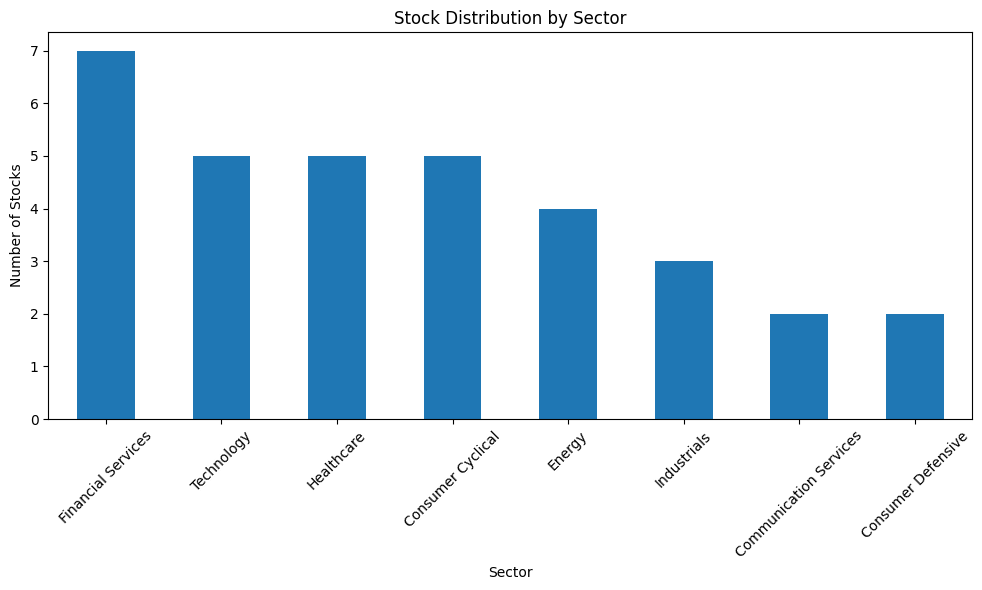

In [205]:
sector_counts = df_fundamentals['Sector'].value_counts()
print("Stocks by Sector:")
print(sector_counts)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sector_counts.plot(kind='bar')
plt.title('Stock Distribution by Sector')
plt.ylabel('Number of Stocks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


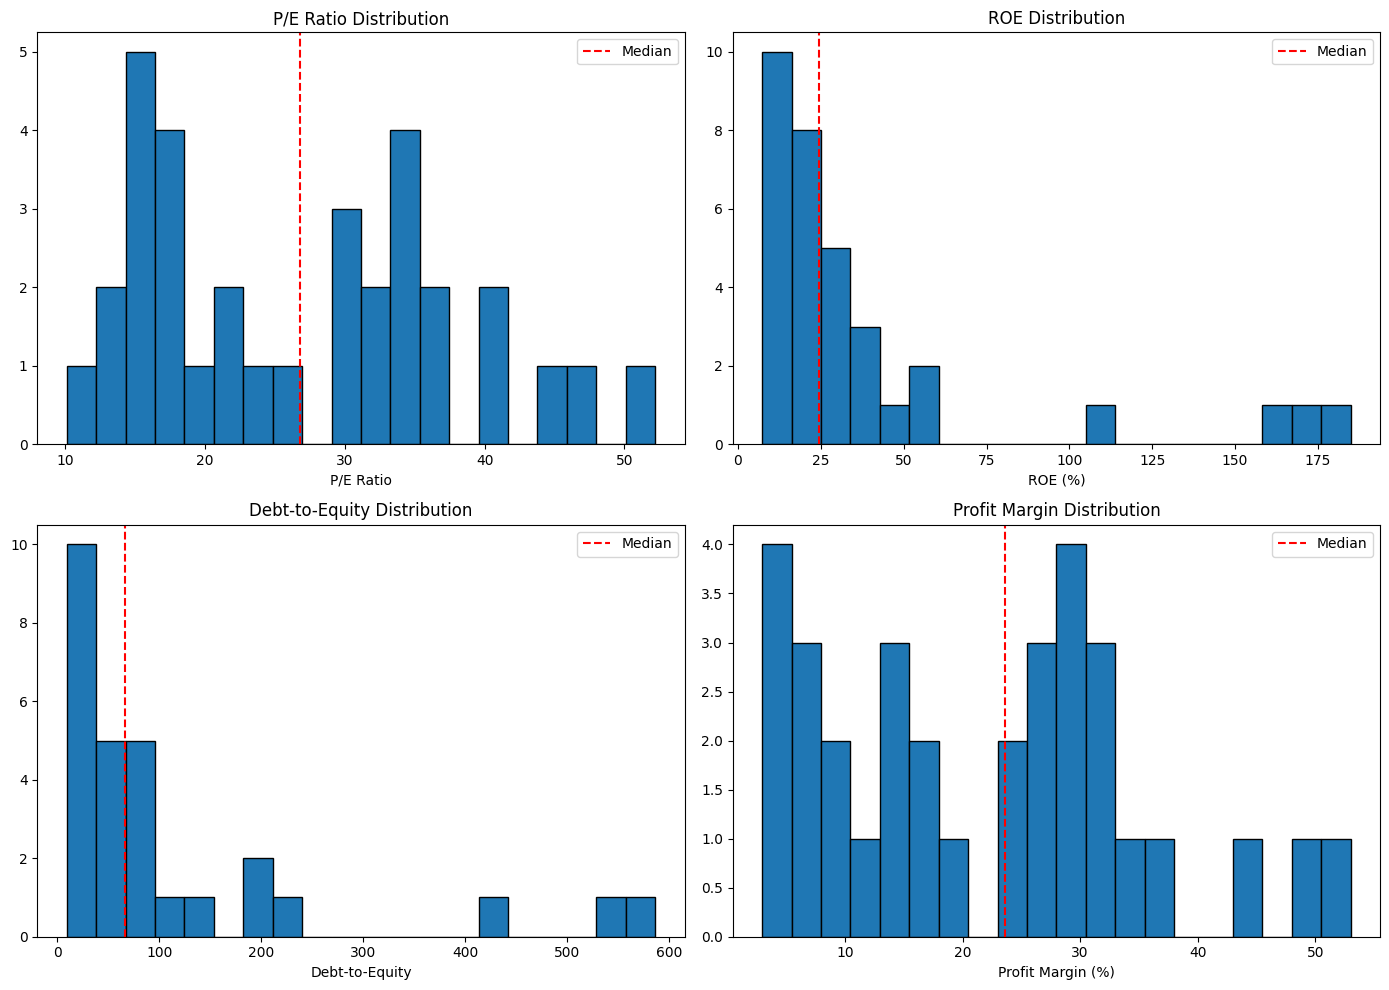

In [206]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(df_fundamentals['PE_Ratio'], bins=20, edgecolor='black')
axes[0, 0].set_title('P/E Ratio Distribution')
axes[0, 0].set_xlabel('P/E Ratio')
axes[0, 0].axvline(df_fundamentals['PE_Ratio'].median(), color='red', linestyle='--', label='Median')
axes[0, 0].legend()

axes[0, 1].hist(df_fundamentals['ROE'] * 100, bins=20, edgecolor='black')
axes[0, 1].set_title('ROE Distribution')
axes[0, 1].set_xlabel('ROE (%)')
axes[0, 1].axvline(df_fundamentals['ROE'].median() * 100, color='red', linestyle='--', label='Median')
axes[0, 1].legend()

axes[1, 0].hist(df_fundamentals['Debt_to_Equity'], bins=20, edgecolor='black')
axes[1, 0].set_title('Debt-to-Equity Distribution')
axes[1, 0].set_xlabel('Debt-to-Equity')
axes[1, 0].axvline(df_fundamentals['Debt_to_Equity'].median(), color='red', linestyle='--', label='Median')
axes[1, 0].legend()

axes[1, 1].hist(df_fundamentals['Profit_Margin'] * 100, bins=20, edgecolor='black')
axes[1, 1].set_title('Profit Margin Distribution')
axes[1, 1].set_xlabel('Profit Margin (%)')
axes[1, 1].axvline(df_fundamentals['Profit_Margin'].median() * 100, color='red', linestyle='--', label='Median')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

Tech Stocks by ROE:
  Symbol                   Name      ROE   PE_Ratio
0   AAPL             Apple Inc.  1.71422  36.761710
3   NVDA     NVIDIA Corporation  1.07359  44.099255
5   ADBE             Adobe Inc.  0.55426  20.831736
1   MSFT  Microsoft Corporation  0.32241  33.906760
6    CRM       Salesforce, Inc.  0.12184  34.033380


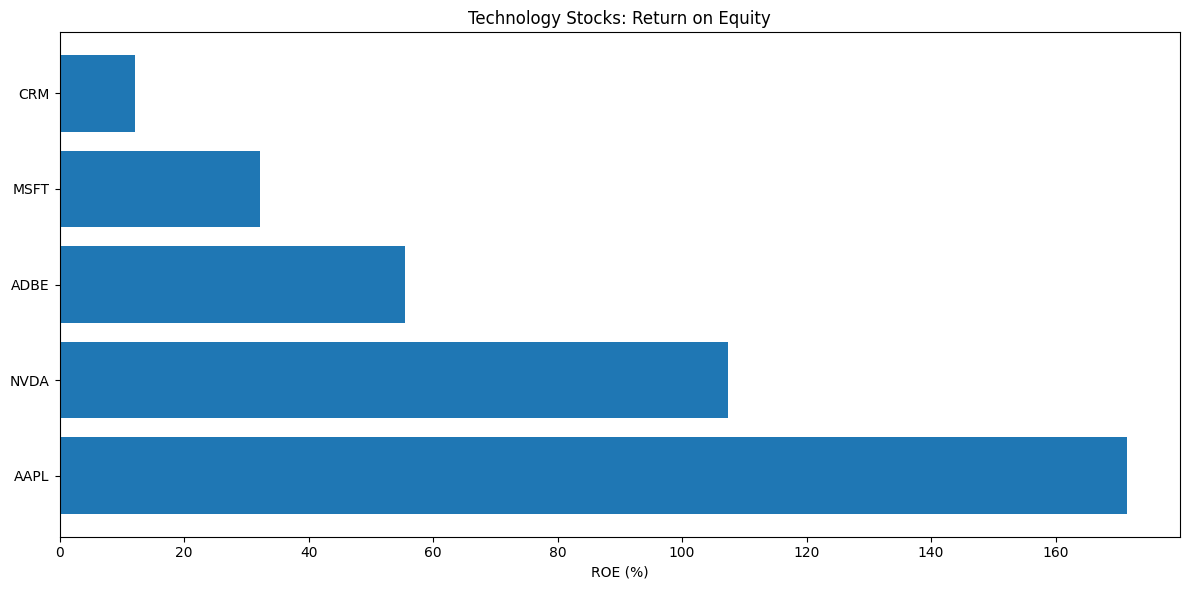

In [207]:
tech_stocks = df_fundamentals[df_fundamentals['Sector'] == 'Technology']

tech_stocks_sorted = tech_stocks.sort_values('ROE', ascending=False)
print("Tech Stocks by ROE:")
print(tech_stocks_sorted[['Symbol', 'Name', 'ROE', 'PE_Ratio']])

fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(tech_stocks_sorted['Symbol'], tech_stocks_sorted['ROE'] * 100)
ax.set_xlabel('ROE (%)')
ax.set_title('Technology Stocks: Return on Equity')
plt.tight_layout()
plt.show()


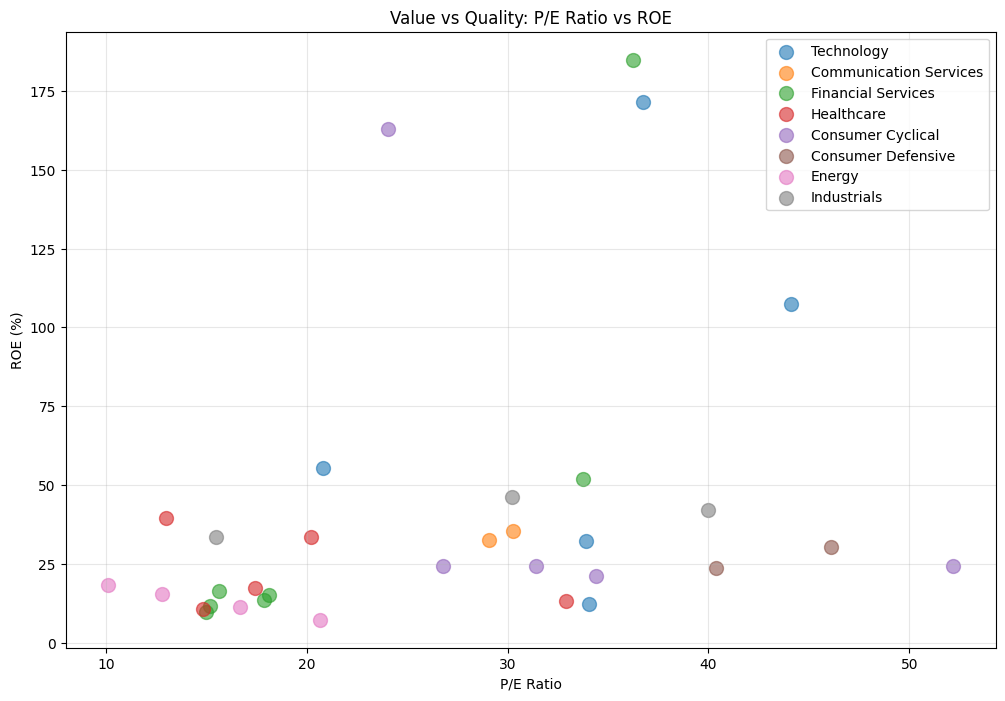

In [208]:
plt.figure(figsize=(12, 8))

for sector in df_fundamentals['Sector'].unique():
    sector_data = df_fundamentals[df_fundamentals['Sector'] == sector]
    plt.scatter(sector_data['PE_Ratio'], 
                sector_data['ROE'] * 100, 
                label=sector, 
                alpha=0.6, 
                s=100)

plt.xlabel('P/E Ratio')
plt.ylabel('ROE (%)')
plt.title('Value vs Quality: P/E Ratio vs ROE')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [209]:
good_value_stocks = df_fundamentals[
    (df_fundamentals['PE_Ratio'] < 20) &  # Not expensive
    (df_fundamentals['ROE'] > 0.15) &     # Good returns (>15%)
    (df_fundamentals['Debt_to_Equity'] < 1) &  # Not too much debt
    (df_fundamentals['Profit_Margin'] > 0.10)  # Profitable (>10%)
]

print(f"Found {len(good_value_stocks)} value stocks:")
print(good_value_stocks[['Symbol', 'Name', 'PE_Ratio', 'ROE', 'Sector']])

Found 0 value stocks:
Empty DataFrame
Columns: [Symbol, Name, PE_Ratio, ROE, Sector]
Index: []


In [210]:
top_5 = df_fundamentals.nlargest(5, 'ROE')[['Symbol', 'Name', 'ROE', 'PE_Ratio']]
bottom_5 = df_fundamentals.nsmallest(5, 'ROE')[['Symbol', 'Name', 'ROE', 'PE_Ratio']]

print("TOP 5 by ROE:")
print(top_5)
print("\nBOTTOM 5 by ROE:")
print(bottom_5)

TOP 5 by ROE:
   Symbol                     Name      ROE   PE_Ratio
14     MA  Mastercard Incorporated  1.84861  36.236877
0    AAPL               Apple Inc.  1.71422  36.761710
23     HD     The Home Depot, Inc.  1.62909  24.040900
3    NVDA       NVIDIA Corporation  1.07359  44.099255
5    ADBE               Adobe Inc.  0.55426  20.831736

BOTTOM 5 by ROE:
   Symbol                         Name      ROE   PE_Ratio
29    CVX          Chevron Corporation  0.07316  20.669014
9     BAC  Bank of America Corporation  0.09871  14.975409
17    PFE                  Pfizer Inc.  0.10598  14.843023
28    XOM      Exxon Mobil Corporation  0.11424  16.668604
10    WFC        Wells Fargo & Company  0.11520  15.187809


In [211]:
good_value_stocks.to_csv('value_stocks_candidates.csv', index=False)
print("Saved potential investment candidates")

Saved potential investment candidates
